# imports

In [1]:
import os
import pickle
from helper import process_video, standardize, diff

# process and save

In [2]:
os.makedirs('data/pkl', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

In [3]:
for file in os.listdir("data/original"):
    if file.lower().endswith(".mov"):
        # process video
        filename = file.split('.')[0]
        input_path = f"data/original/{file}"
        output_path = f"data/processed/{filename}.mp4"
        frame_rate = 6
        process_video(input_path, output_path, frame_rate)

Processing user0: 16617it [01:24, 196.94it/s]                           
Processing user1: 20252it [02:47, 120.81it/s]                           


In [4]:
import cv2
for file in os.listdir("data/processed"):
    cap = cv2.VideoCapture(f"data/processed/{file}")
    print(f"{file}: {cap.get(cv2.CAP_PROP_FRAME_COUNT)} frames at {cap.get(cv2.CAP_PROP_FPS)} FPS")

user0.mp4: 5539.0 frames at 6.0 FPS
user1.mp4: 5063.0 frames at 6.0 FPS


# load data

In [5]:
users = []
for i in range(0, 6):
    filepath = f"data/pkl/user{i}.pkl"
    if not os.path.exists(filepath):
        break
    with open(filepath, 'rb') as f:
        users.append(pickle.load(f))
    print(f"user{i}: {len(users[-1])} frames")

user0: 5301 frames
user1: 5061 frames


In [6]:
temp = []
for user in users:
    new = diff(standardize(user))
    temp.append(new)
data = temp

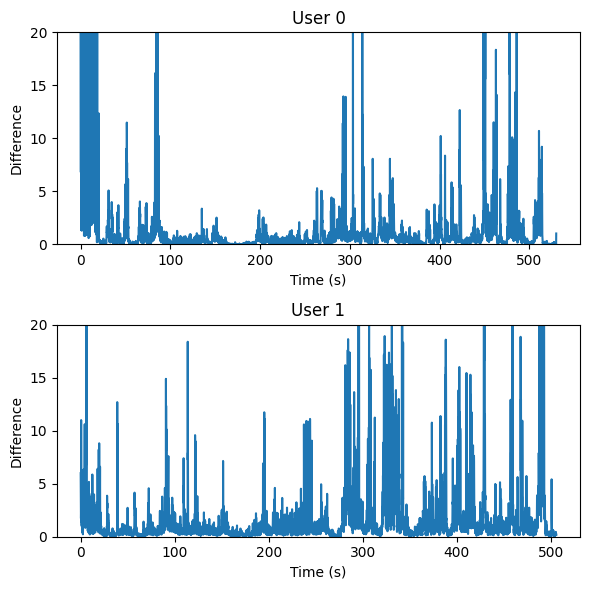

In [7]:
import matplotlib.pyplot as plt
# loop through all users and plot in a grid
num_users = len(data)
fig, axs = plt.subplots(num_users, 1, figsize=(6, 3*num_users))
for i in range(num_users):
     y = data[i]
     x = [j/10 for j in range(len(y))]
     axs[i].plot(x, y)
     axs[i].set_title(f"User {i}")
     axs[i].set_xlabel("Time (s)")
     axs[i].set_ylim([0, 20])
     axs[i].set_ylabel("Difference")
plt.tight_layout()
plt.xlabel("Time (s)")
plt.ylabel("Difference")
plt.show()